# This notebook studies the impact of single-point noise events on the value of sample correlation coefficients.
Author: K.-Michael Aye

In [1]:
# switch to inline plotting
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
nsamples = 500

I create two random arrays with [nsamples] samples from the 'standard normal' distribution. Pandas dataframes keep the data in named tabular format for easy access. The head() function shows the first 5 rows of the dataframe.

In [3]:
df = pd.DataFrame({'arr1':randn(nsamples),
                   'arr2':randn(nsamples)})
df.head()

,arr1,arr2
0,-0.005987,0.028308
1,0.848893,0.500231
2,-0.916263,-0.353570
3,-2.386515,0.781078
4,0.325919,-1.086521


The mean value indicates that the random-ness was chosen to be around 0:

In [4]:
df.mean()

arr1   -0.051068
arr2    0.000035
dtype: float64

Dataframes built-in plot function plots all columns over the index. In this case the index is just the array index.

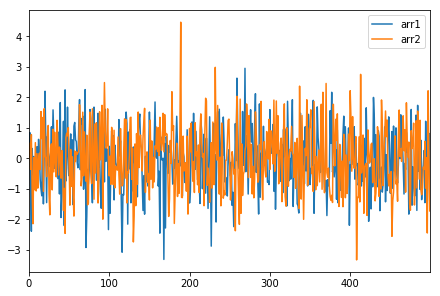

In [5]:
df.plot()

### Sample Pearson correlation coefficient

The sample Pearson correlation coefficient $r$ determines how linearly correlated two samples of variables $X$ and $Y$ are with the following calculation:  

$$ r = \frac{1}{n-1}\sum_{i=1}^n \left(\frac{X_i - \overline{X}}{s_X}\right)
\left(\frac{Y_i - \overline{Y}}{s_Y}\right)$$

where

$$\frac{X_i - \overline{X}}{s_X}$$ 

is the "standard score" and $\overline{X}$ and $s_X$ are the sample mean and standard deviation. The resulting value lies between -1 and 1, with -1 meaning perfect anti-correlation, 0 no correlation and 1 perfect correlation.

In the below embedded Wikipedia article you can see some example plots and you also can scroll down to confirm the mathematical definition I copied here.

In [6]:
from IPython.display import HTML
HTML('<iframe src=http://en.wikipedia.org/wiki/'
     'Pearson_product-moment_correlation_coefficient?useformat=mobile '
     'width=600 height=550></iframe>')

When we plot arr1 against arr2, we get something very similar to the $\rho=0$ case.

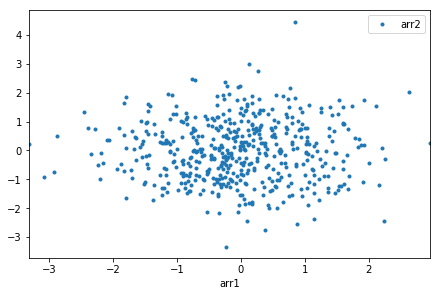

In [6]:
df.plot('arr1','arr2',style='.')

And using the dataframe method `corr()` the calculated Pearson $r$ values are close to zero, confirming the lack of similarity, and the self-correlations of course being at 1.0

In [7]:
df.corr()

,arr1,arr2
arr1,1.000000,0.004896
arr2,0.004896,1.000000


Pandas offers two more algorithms to calculate correlation, "Kendall" and "Spearman". Let's see how they compare, the values to compare are in row 'arr1' and column 'row2' or vice versa.

In [10]:
methods = 'pearson kendall spearman'.split()
for method in methods:
    print(method)
    print(df.corr(method=method))
    print()

pearson
          arr1      arr2
arr1  1.000000  0.004896
arr2  0.004896  1.000000

kendall
          arr1      arr2
arr1  1.000000  0.008786
arr2  0.008786  1.000000

spearman
          arr1      arr2
arr1  1.000000  0.012999
arr2  0.012999  1.000000



The Kendall and Spearman values are often slightly larger, sometimes smaller than Pearson's $r$ when I run this notebook repeatedly, but all still very close to zero.

I will put this code into a function because I will use it often.

In [12]:
def get_corrs(df):
    methods = 'pearson kendall spearman'.split()
    for method in methods:
        print(method)
        print(df.corr(method=method))
        print()

Now let's see what happens to the correlation values when we put very localized spikes into the data. As an example I will add the value 5 to the index 20 and subtract 5 at the index 200 and plot the resulting arrays.

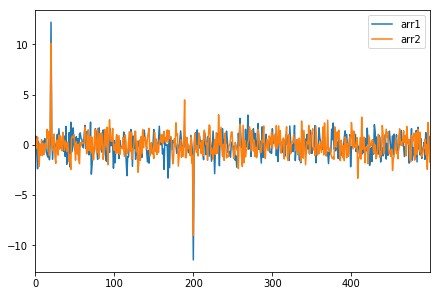

In [14]:
df.iloc[20]+=5
df.iloc[200]-=5
df.plot()

How did this small change affect the correlation coefficients?

In [16]:
get_corrs(df)

pearson
         arr1     arr2
arr1  1.00000  0.30496
arr2  0.30496  1.00000

kendall
          arr1      arr2
arr1  1.000000  0.018469
arr2  0.018469  1.000000

spearman
          arr1      arr2
arr1  1.000000  0.027445
arr2  0.027445  1.000000



Impressively, the $r$ value has increased a lot, while the Kendall and Spearman values seem unimpressed. Let's add more spikes.

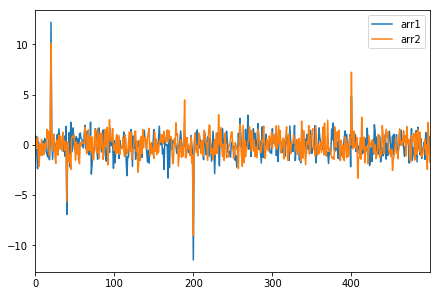

In [17]:
df.iloc[40]-=5
df.iloc[400]+=5
df.plot()

In [18]:
get_corrs(df)

pearson
          arr1      arr2
arr1  1.000000  0.366137
arr2  0.366137  1.000000

kendall
          arr1      arr2
arr1  1.000000  0.025459
arr2  0.025459  1.000000

spearman
          arr1      arr2
arr1  1.000000  0.037678
arr2  0.037678  1.000000



Again, the $r$ value has increased far more than the Kendall and Spearman values. Let's see how many spikes we need to create a value larger than 0.5, i.e. a value that would indicate 'more correlation' than 'not being correlated'.

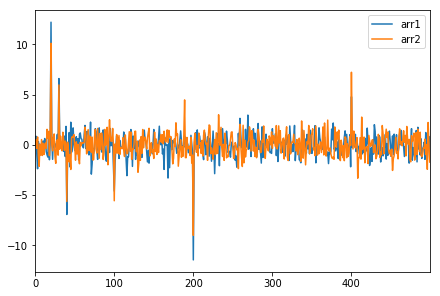

In [19]:
df.iloc[30]+=5
df.iloc[100]-=5
df.plot()

In [20]:
get_corrs(df)

pearson
         arr1     arr2
arr1  1.00000  0.41133
arr2  0.41133  1.00000

kendall
         arr1     arr2
arr1  1.00000  0.03176
arr2  0.03176  1.00000

spearman
          arr1      arr2
arr1  1.000000  0.046827
arr2  0.046827  1.000000



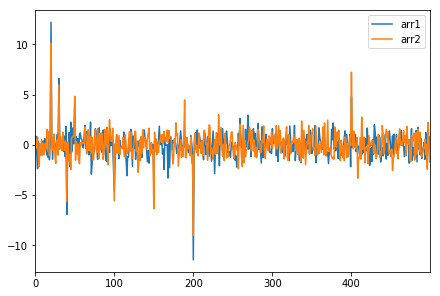

In [21]:
df.iloc[50]+=5
df.iloc[150]-=5
df.plot()

In [22]:
get_corrs(df)

pearson
          arr1      arr2
arr1  1.000000  0.439924
arr2  0.439924  1.000000

kendall
         arr1     arr2
arr1  1.00000  0.04218
arr2  0.04218  1.00000

spearman
          arr1      arr2
arr1  1.000000  0.062345
arr2  0.062345  1.000000



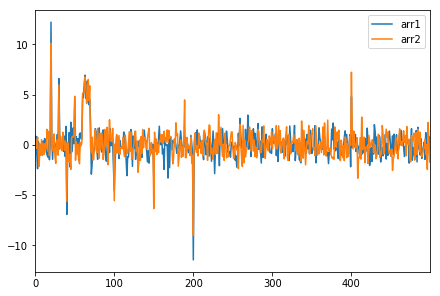

In [23]:
df.iloc[60:70]+=5
df.plot()

In [24]:
get_corrs(df)

pearson
         arr1     arr2
arr1  1.00000  0.57178
arr2  0.57178  1.00000

kendall
          arr1      arr2
arr1  1.000000  0.077242
arr2  0.077242  1.000000

spearman
          arr1      arr2
arr1  1.000000  0.114505
arr2  0.114505  1.000000



Notice that this time I lifted a block of ten values by 5. It seems that localized spike needles would require a lot to finally reach a $r$ value greater than 0.5, while ten values after each other lifting in both arrays renders them far more correlated. At this point some of the runs I performed with the notebook have reached a $r$ value of $> 0.5$, but sometimes I need to add one more noise block. The reason for this difference seems to be how uncorrelated the initial random arrays appeared.

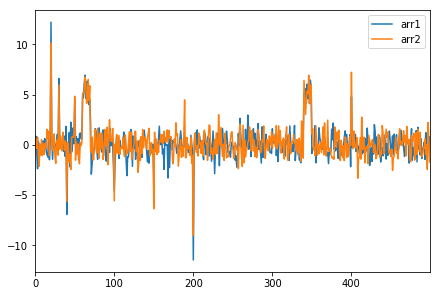

In [25]:
df.iloc[340:350]+=5
df.plot()

In [26]:
get_corrs(df)

pearson
          arr1      arr2
arr1  1.000000  0.644623
arr2  0.644623  1.000000

kendall
          arr1      arr2
arr1  1.000000  0.110926
arr2  0.110926  1.000000

spearman
          arr1      arr2
arr1  1.000000  0.164102
arr2  0.164102  1.000000



Let's revisit the scatter plot, as a comparison to before.

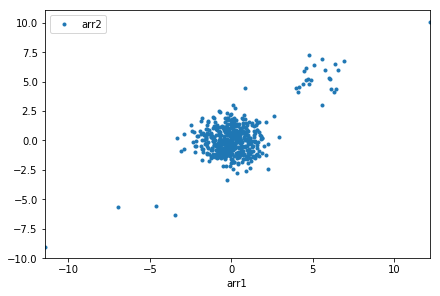

In [27]:
df.plot('arr1', 'arr2',style='.')

One can understand how the calculations might now indicate a linear correlation between the two variables 'arr1' and 'arr2'.

### Different noise amplitudes

Now let's have a quick look if different amplitudes of noise in the two arrays influence the reaction of the $r$ value.

In [28]:
df2 = pd.DataFrame({'arr1':randn(nsamples),
                   'arr2':randn(nsamples)})
df2.corr()

,arr1,arr2
arr1,1.000000,0.050237
arr2,0.050237,1.000000


In [29]:
df2.iloc[10]['arr1']+=3
df2.iloc[10]['arr2']+=10

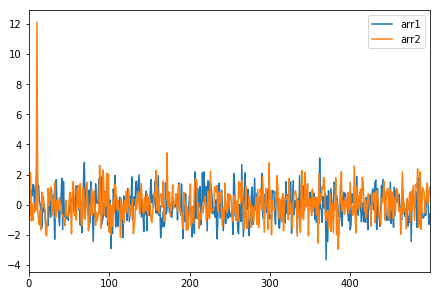

In [30]:
df2.plot()

In [31]:
df2.corr()

,arr1,arr2
arr1,1.000000,0.112024
arr2,0.112024,1.000000


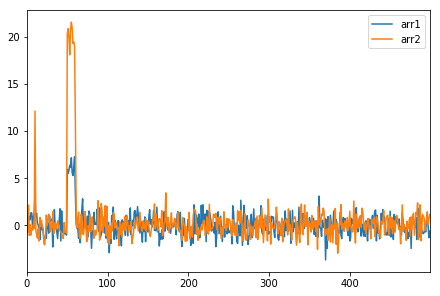

In [35]:
df2.loc[50:60,'arr1']+=3
df2.loc[50:60,'arr2']+=10
df2.plot()

In [36]:
df2.corr()

,arr1,arr2
arr1,1.00000,0.63338
arr2,0.63338,1.00000


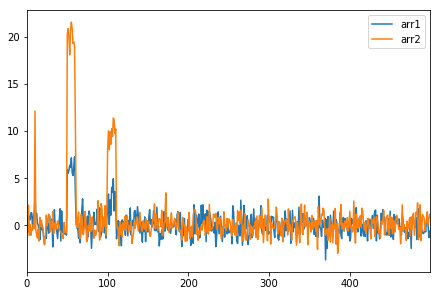

In [37]:
df2.loc[100:110,'arr1']+=3
df2.loc[100:110,'arr2']+=10
df2.plot()

In [38]:
df2.corr()

,arr1,arr2
arr1,1.000000,0.664084
arr2,0.664084,1.000000


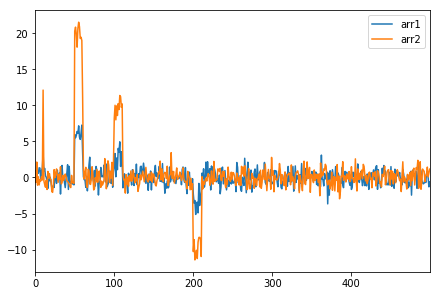

In [39]:
df2.loc[200:210,'arr1']-=3
df2.loc[200:210,'arr2']-=10
df2.plot()

In [40]:
df2.corr()

,arr1,arr2
arr1,1.000000,0.708009
arr2,0.708009,1.000000


I would conclude that this is not the case, the fact that the noise happens at the same time seems to be the more stringent factor and a few noise events renders the 2 arrays to be correlated rather fast. For completeness, I also show the scatter plot again.

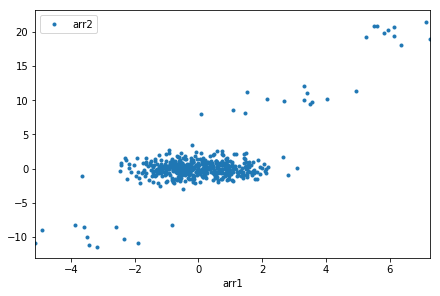

In [41]:
df2.plot('arr1','arr2',style='.')